## Thyroid Disease Prediction


##### Problem Statement : To build a classification methodology to predict the type of Thyroid a person has ,based on the below features.
Age - Age of the person

Sex - Male or Female

On Thyroxine - true or false

On Antithyroid Medication - true or false

Sick - true or false

Pregnant - true or false

Thyroid surgery - true or false

I131 Treatment - true or false

Query Hypothyroid - true or false

Query Hyperthyroid -true or false

Lithium - true or false

Goitre - true or false

Tumor - true or false

Hypopituitary- true or false

Psych - true or false

TSH measured - true or false

TSH - thyroid stimulating hormone floating value

T3 Measured - true or false

T3 - triiodothyronine value

TT4 Measured- true or false

TT4 - Thyroxine value

T4U Measured- true or false

T4U - numerical value

FTI Measured- true or false

FTI -Free Thyroxine Index

TBG Measured- true or false

TBG -Thyroid-Binding Globulin value

Category - different types of thyroid

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import pickle
import six
import sys
sys.modules['sklearn.externals.six'] = six

import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler
from sklearn.preprocessing import LabelEncoder

import imblearn.over_sampling
#from imblearn.over_sampling import KMeansSMOTE
import sklearn.impute
#from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

sns.set()

In [43]:
# import log file
import logging
logging.basicConfig(filename="Preprocessing.ipynb.log", level=logging.INFO, format='%(asctime)s %(message)s',
					datefmt="%Y-%m-%d %H:%M:%S")



In [44]:
## Load Dataset
logging.info("Reading  dataset.........")
data = pd.read_csv('data/thyroid_data.csv')
data.head(5)

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41,F,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,1,23,F,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,negative
2,2,46,M,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,negative
3,3,70,F,t,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,negative
4,4,70,F,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative


In [45]:
data.columns

Index(['S.no', 'Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH',
       'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U',
       'FTI Measured', 'FTI', 'Category'],
      dtype='object')

In [46]:
logging.info("Data Info.........")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.no                       3221 non-null   int64 
 1   Age                        3221 non-null   object
 2   Sex                        3221 non-null   object
 3   On Thyroxine               3221 non-null   object
 4   Query on Thyroxine         3221 non-null   object
 5   On Antithyroid Medication  3221 non-null   object
 6   Sick                       3221 non-null   object
 7   Pregnant                   3221 non-null   object
 8   Thyroid Surgery            3221 non-null   object
 9   I131 Treatment             3221 non-null   object
 10  Query Hypothyroid          3221 non-null   object
 11  Query Hyperthyroid         3221 non-null   object
 12  Lithium                    3221 non-null   object
 13  Goitre                     3221 non-null   object
 14  Tumor   

In [47]:
## We can see from the data description that there are no missing values. But if we check the dataset the missing values are replaced with invalid values like '?'. 
## Let's replace such values with 'nan' and check for missing values again.

In [48]:
#checking number of invalid value like '?' present in each column

for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        print(column, count)

Age 1
Sex 127
TSH 247
T3 589
TT4 142
T4U 276
FTI 274


In [49]:
## We can clearly see that out lots of data having '?' in place of value.
## So these are the columns which have missing values but missing values are replaced with '?'.
## We will replace these values with 'nan' and then do imputation of these missing values. 

In [50]:
## Also, looking to the dataset, we can see that some columns are with true and false value.
## data are just the indication that whether the next column has values or not.

In [51]:
## Let's see an example:
data[['TSH Measured','TSH']].head()

,TSH Measured,TSH
0,t,1.3
1,t,4.1
2,t,0.98
3,t,0.16
4,t,0.72


In [52]:
## So we can drop measured features from the dataset. So that easy to model building
logging.info("Droping unnecessary from dataset.........")
data = data.drop(['TSH Measured','T3 Measured','TT4 Measured','T4U Measured','FTI Measured','S.no'],axis =1)


In [53]:
data.columns

Index(['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'Category'],
      dtype='object')

In [54]:
# Now let's replace the '?' values with numpy nan
logging.info("Replacing '?' from  dataset with np.nan .........")
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        data[column] = data[column].replace('?',np.nan)

In [55]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count==0:
        print(column, count)

Age 0
Sex 0
On Thyroxine 0
Query on Thyroxine 0
On Antithyroid Medication 0
Sick 0
Pregnant 0
Thyroid Surgery 0
I131 Treatment 0
Query Hypothyroid 0
Query Hyperthyroid 0
Lithium 0
Goitre 0
Tumor 0
Hypopituitary 0
Psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Category 0


In [56]:
## Now we see the null value in our data

data.isnull().sum()

Age                            1
Sex                          127
On Thyroxine                   0
Query on Thyroxine             0
On Antithyroid Medication      0
Sick                           0
Pregnant                       0
Thyroid Surgery                0
I131 Treatment                 0
Query Hypothyroid              0
Query Hyperthyroid             0
Lithium                        0
Goitre                         0
Tumor                          0
Hypopituitary                  0
Psych                          0
TSH                          247
T3                           589
TT4                          142
T4U                          276
FTI                          274
Category                       0
dtype: int64

Since the values are categorical, we have to change them to numerical before we use any imputation techniques.

We can use get dummies but since most of the columns have only two distinct categories we will use mapping for them. Why? Because since there are only two categories then the two columns formed after get dummies will both have very high correaltion since they both explain the same thing. So in anyway we will have to drop one of the columns. That's why let's use mapping for such columns. For columns with more than two categories we will use get dummies.

In [57]:
# In sex column we have to map 0 for F and 1 for M

data['Sex'] = data['Sex'].map({'F' : 0, 'M' : 1})

# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
# let's write map them all in one go
for column in data.columns:
    if  len(data[column].unique())==2:
        data[column] = data[column].map({'f' : 0, 't' : 1})
        
# this will map all the rest of the columns as we require.

In [58]:
data.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Category
0,41,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.3,2.5,125,1.14,109,negative
1,23,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.1,2,102,NaN,NaN,negative
2,46,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,NaN,109,0.91,120,negative
3,70,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175,NaN,NaN,negative
4,70,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61,0.87,70,negative


Now our ouptut class that is Category   also has 4 distinct categories. There is no sense of using get dummies with our Output class, so we will just map them. Let's use LabelEncoder function for this.

In [59]:
data['Category'].unique()

array(['negative', 'hyperthyroid', 'hypothyroid', 'sick'], dtype=object)

In [60]:
data["Category"].value_counts()

negative        2753
hypothyroid      220
sick             171
hyperthyroid      77
Name: Category, dtype: int64

Label encoding is a simple technique where each unique category is assigned an integer value.

In Python, you can use libraries like scikit-learn to perform label encoding. 

In [61]:
## Now apply Labelencoder
from sklearn.preprocessing import LabelEncoder
import pickle
import os

#lblEn = LabelEncoder()
#df['Class'] =lblEn.fit_transform(df['Class'])

encode = LabelEncoder().fit(data['Category'])

data['Category'] = encode.transform(data['Category'])

# we will save the encoder as pickle to use when we do the prediction. We will need to decode the predcited values
# back to original

file = "enc.pickle"
pickle.dump(encode, open(file, "wb"))

In [62]:
data.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Category
0,41,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.3,2.5,125,1.14,109,2
1,23,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.1,2,102,NaN,NaN,2
2,46,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,NaN,109,0.91,120,2
3,70,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175,NaN,NaN,2
4,70,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61,0.87,70,2


In [63]:
data["Category"].value_counts()

2    2753
1     220
3     171
0      77
Name: Category, dtype: int64

In [64]:
data.describe(include = "all")

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Category
count,3220,3094.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,...,3221.000000,3221.000000,3221.000000,3221.000000,2974,2632,3079,2945,2947,3221.000000
unique,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,263,64,217,138,209,NaN
top,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.2,2,101,0.99,112,NaN
freq,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,103,184,73,89,59,NaN
mean,NaN,0.318681,0.106489,0.014902,0.010866,0.043775,0.014281,0.012729,0.017386,0.065508,...,0.008382,0.028252,0.000621,0.045948,NaN,NaN,NaN,NaN,NaN,1.936976
std,NaN,0.466040,0.308510,0.121180,0.103689,0.204626,0.118666,0.112120,0.130725,0.247458,...,0.091186,0.165718,0.024915,0.209406,NaN,NaN,NaN,NaN,NaN,0.461636
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2.000000


Now that we have encoded all our Categorical values. Let's start with imputing the missing values.

In [65]:
from sklearn.impute import KNNImputer
imputer=sklearn.impute.KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
# convert the nd-array returned in the step above to a Dataframe
new_df=pd.DataFrame(data=np.round(new_array), columns=data.columns)


In [66]:
new_df.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Category
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,125.0,1.0,109.0,2.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,2.0,102.0,1.0,96.0,2.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,109.0,1.0,120.0,2.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,175.0,1.0,177.0,2.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,61.0,1.0,70.0,2.0


In [67]:
## Now see that null value is present in our dataset
new_df.isnull().sum()

Age                          0
Sex                          0
On Thyroxine                 0
Query on Thyroxine           0
On Antithyroid Medication    0
Sick                         0
Pregnant                     0
Thyroid Surgery              0
I131 Treatment               0
Query Hypothyroid            0
Query Hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Category                     0
dtype: int64

Let's check the distribution for our continous data in the dataset:



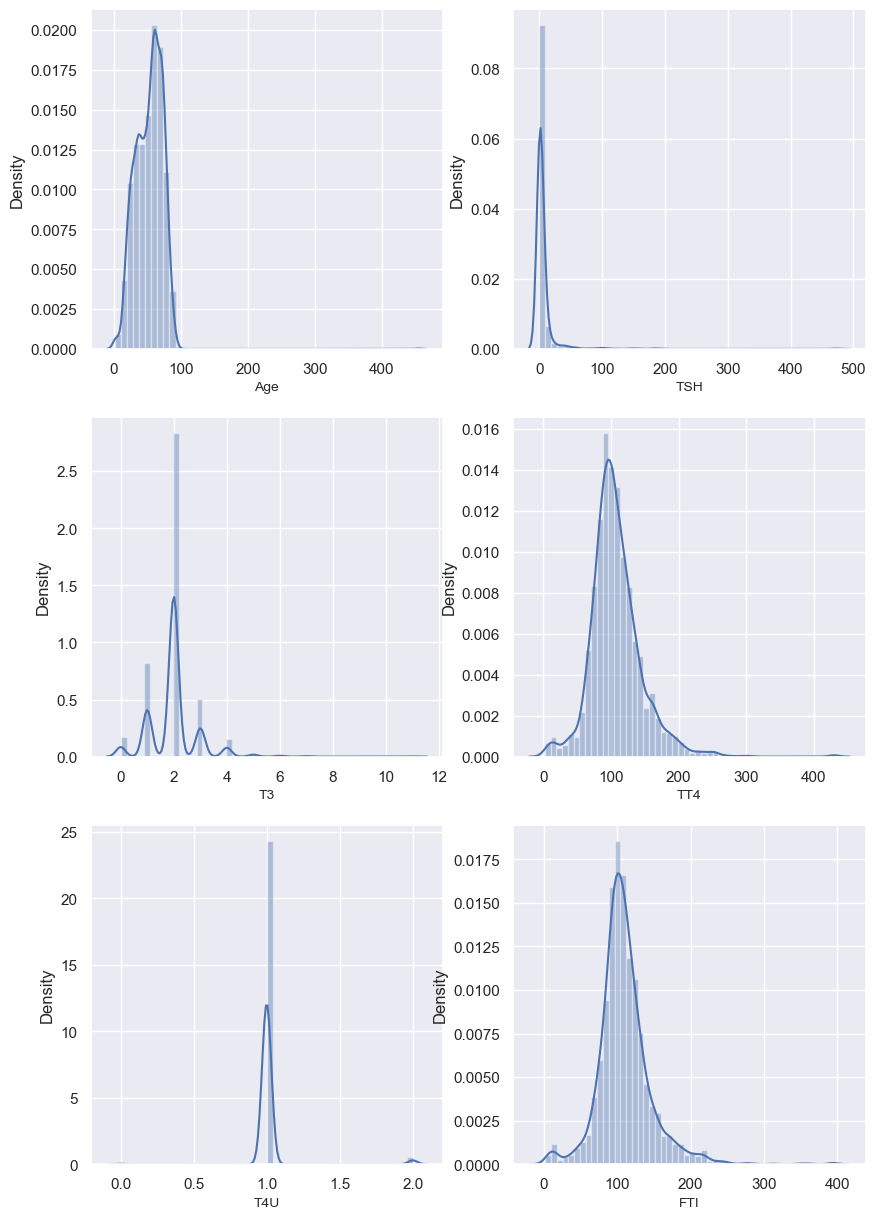

In [68]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

# To filter specific warnings by category
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
# Add more categories as needed


columns = ['Age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(new_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Let's do some transformations to the data and see if it improves the plot.

Before doing log transformation , let's add 1 to each valuue in the column to handle exception when we try to find log of '0'.

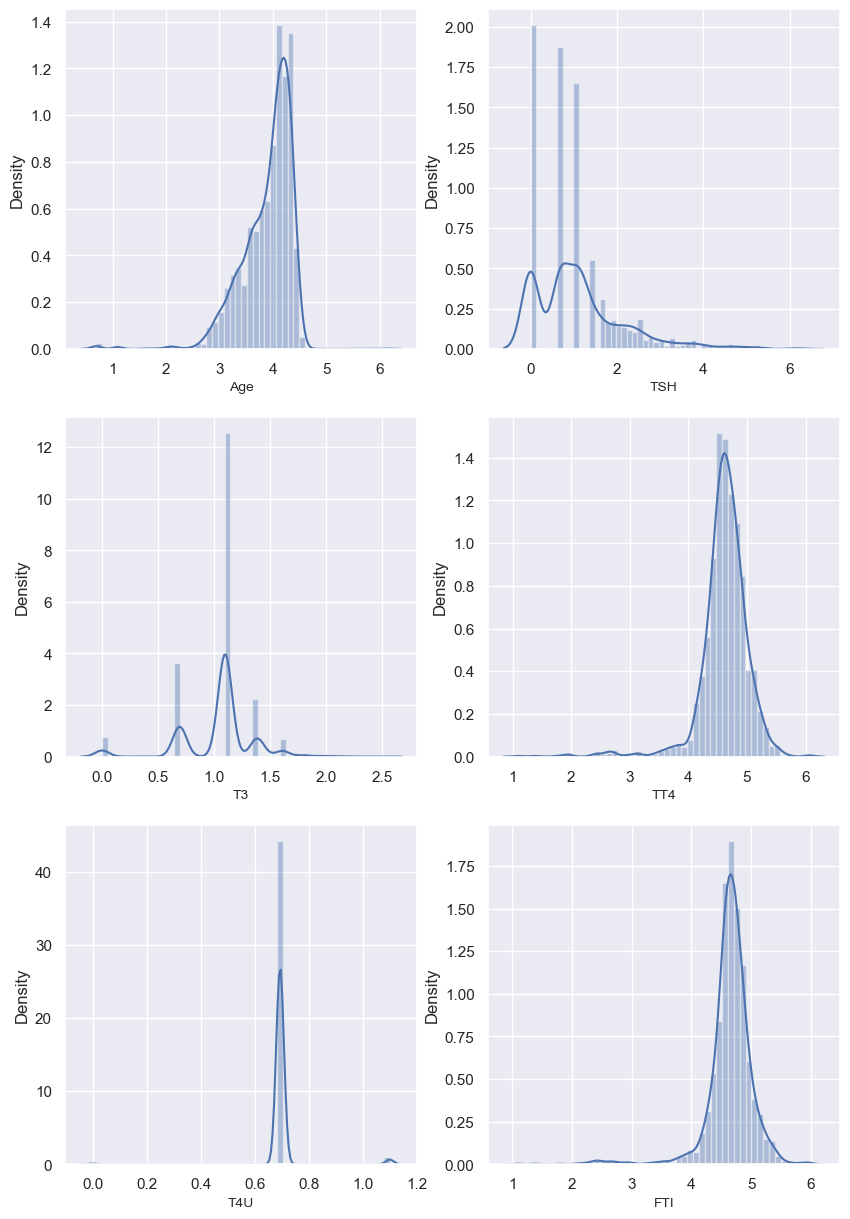

In [69]:
columns = ['Age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_df[column]+=1
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_df[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

After log transformation, rest of the columns look fine but 'TSH' has a weird trend.

It won't give much of information so let's drop this column.

In [70]:
new_df = new_df.drop(['TSH'],axis=1)

let's see how balanced our dataset in terms of given target classes:

In [71]:
new_df["Category"].value_counts()
## We can see that out target data is highly imbalanced

2.0    2753
1.0     220
3.0     171
0.0      77
Name: Category, dtype: int64

We can clerly see that the dataset is highly imbalanced.

We will use a python library known as imbalanced-learn to deal with imbalanced data. Imbalanced learn has an algorithm called RandomOverSampler.

In [72]:
x = new_df.drop(['Category'],axis=1)
y = new_df['Category']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [73]:
x_sampled.shape

(11012, 20)

In [74]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,Query Hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,T3,TT4,T4U,FTI
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,97.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0


In [75]:
y_sampled.value_counts()

2.0    2753
0.0    2753
1.0    2753
3.0    2753
Name: Category, dtype: int64

In [76]:
import pandas as pd
#logging.info("Saving the train dataset .........")
# Assuming 'train_data' is your DataFrame
#new_df.to_csv(r'C:\Users\nk141\OneDrive\Desktop\Thyroid_Disease_Detection\notebooks\data\new_df.csv', index=False)


In [77]:
x_sampled.to_csv(r'F:\Thyroid_Disease_Detection\notebooks\data\x_sampled.csv', index=False)


In [78]:
y_sampled.to_csv(r'F:\Thyroid_Disease_Detection\notebooks\data\y_sampled.csv', index=False)


Now we calearly see that our target output data is balanced